In [49]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold

warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:
df = pd.read_csv('FinalDataset.csv')
df = df[df["Received Rate"] <= 40]

In [51]:
Y = df.ix[:,3]
X = df.ix[:,1:3]


In [52]:
Y[Y>0.2] = 1
Y[Y<=0.2] = 0

In [53]:
Y.mean()

0.14285714285714285

In [54]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.4,random_state = 1)
#x_test,x_val,y_test,y_val = train_test_split(x_test,y_test,test_size = 0.5,random_state = 1)

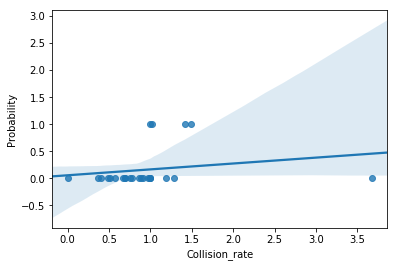

In [55]:
sns.regplot(x_train.ix[:,1],y_train)

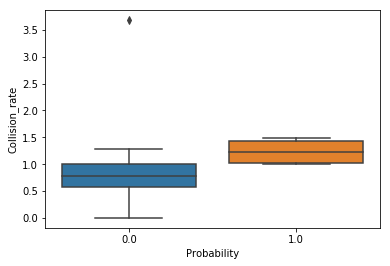

In [56]:
sns.boxplot(x = y_train,y= x_train.ix[:,1])

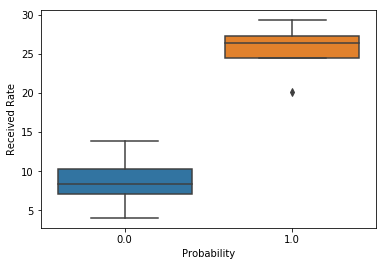

In [57]:
sns.boxplot(x = y_train,y= x_train.ix[:,0])

In [ ]:
RandomForestClassifier(m)

In [58]:
from sklearn.model_selection import GridSearchCV

In [105]:
r_range = list(range(2,12))

param_grid = dict(max_depth = r_range,max_leaf_nodes = r_range)

print (param_grid)

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]}


In [112]:
c = GridSearchCV(RandomForestClassifier(),param_grid,cv = 3,scoring='f1')

In [113]:
c.fit(x_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [114]:
c.grid_scores_

[mean: 0.60800, std: 0.43205, params: {'max_depth': 2, 'max_leaf_nodes': 2},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 2, 'max_leaf_nodes': 3},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 2, 'max_leaf_nodes': 4},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 2, 'max_leaf_nodes': 5},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 2, 'max_leaf_nodes': 6},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 2, 'max_leaf_nodes': 7},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 2, 'max_leaf_nodes': 8},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 2, 'max_leaf_nodes': 9},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 2, 'max_leaf_nodes': 10},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 2, 'max_leaf_nodes': 11},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 3, 'max_leaf_nodes': 2},
 mean: 0.68000, std: 0.47140, params: {'max_depth': 3, 'max_leaf_nodes': 3},
 mean: 1.00000, std: 0.00000, params: {'max_depth': 3, 'max_leaf_nodes': 4

In [115]:
c.best_score_

1.0

In [117]:
model = RandomForestClassifier(max_depth=3,random_state=1,oob_score=True)
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [118]:
y_pred = model.predict(x_test)

In [119]:
print ("The f1 score is : %d" % (f1_score(y_pred,y_test))) 

The f1 score is : 1
